# Example use of YAML SHOP

**NOTE!** This is NOT offical SHOP functionality, or supported by Sintef in any way, but is rather a demonstration of how an alterntive data structure using open standards can be implemented.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

## Import python implementation of SHOP YAML specification

In [2]:
from shopcasebaseclass import ShopCaseBaseClass

## Load an example SHOP case

In [3]:
import basic  # Runs the model

In [4]:
basic.shop  # a pyshop.ShopSession instance

## Convert from ```pyshop.ShopSession``` to a native python data structure

In [5]:
s = ShopCaseBaseClass(basic.shop)

2021-03-02 09:15:05,694 | INFO | shopcasebaseclass.__init__ | Init ShopCase : source_type=<class 'pyshop.shop_runner.ShopSession'>



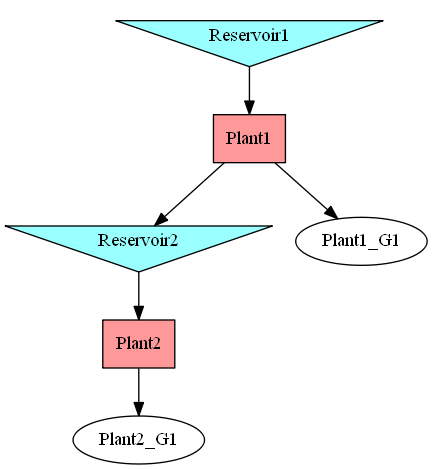

In [6]:
s.show_topology(jupyter_scalable=True, width=200)

## Working with the ```ShopCaseBaseClass``` instance

#### Access SHOP data

In [7]:
s.case  # dict-like structure holding the case data
s.model.reservoir.Reservoir1.inflow  # Access data by tab completions

2018-02-27 00:00:00    101.0
2018-02-27 01:00:00     50.0
2018-02-27 02:00:00     50.0
2018-02-27 03:00:00     50.0
2018-02-27 04:00:00     50.0
2018-02-27 05:00:00     50.0
2018-02-27 06:00:00     50.0
2018-02-27 07:00:00     50.0
2018-02-27 08:00:00     50.0
2018-02-27 09:00:00     50.0
2018-02-27 10:00:00     50.0
2018-02-27 11:00:00     50.0
2018-02-27 12:00:00     50.0
2018-02-27 13:00:00     50.0
2018-02-27 14:00:00     50.0
2018-02-27 15:00:00     50.0
2018-02-27 16:00:00     50.0
2018-02-27 17:00:00     50.0
2018-02-27 18:00:00     50.0
2018-02-27 19:00:00     50.0
2018-02-27 20:00:00     50.0
2018-02-27 21:00:00     50.0
2018-02-27 22:00:00     50.0
2018-02-27 23:00:00     50.0
Name: inflow, dtype: float64

In [8]:
s.describe()  # List objects in model

### Objects in model ###
scenario
  S1
objective
  average_objective
  scen_1
system
  system
reservoir
  Reservoir1
  Reservoir2
plant
  Plant1
  Plant2
generator
  Plant1_G1
  Plant2_G1
market
  Day_ahead


In [9]:
pprint(s.connections.to_dict())  # How objects are connected

{'generator': {'Plant1_G1': [{'connection_type': 'generator_of_plant',
                              'upstream_obj_name': 'Plant1',
                              'upstream_obj_type': 'plant'}],
               'Plant2_G1': [{'connection_type': 'generator_of_plant',
                              'upstream_obj_name': 'Plant2',
                              'upstream_obj_type': 'plant'}]},
 'plant': {'Plant1': [{'connection_type': 'connection_standard',
                       'upstream_obj_name': 'Reservoir1',
                       'upstream_obj_type': 'reservoir'}],
           'Plant2': [{'connection_type': 'connection_standard',
                       'upstream_obj_name': 'Reservoir2',
                       'upstream_obj_type': 'reservoir'}]},
 'reservoir': {'Reservoir2': [{'connection_type': 'connection_standard',
                               'upstream_obj_name': 'Plant1',
                               'upstream_obj_type': 'plant'}]}}


In [10]:
s.commands  # Commands

['start sim 3', 'set code /incremental', 'start sim 3']

In [11]:
s.time  # Time data

{'starttime': Timestamp('2018-02-27 00:00:00'), 'endtime': Timestamp('2018-02-28 00:00:00'), 'timeunit': 'hour', 'timeresolution': 0    1.0
dtype: float64}

### Custom class to hold the data structure

```s.time``` is of type ```<class 'shopcasebaseclass.shopcasebaseclass.DictImitator'>```

The purpose of the custom class is to enable tab completion in jupyter, while preserving (most) of the dictionary methods

```s.case.model.plant.Plant1``` is ```s.case['model']['plant']['Plant1']```

Use ```.to_dict()``` to recursively convert the data structure to native dicts.

The ```__repr__``` method of the custom class prints like a dict:

*{
'starttime': Timestamp('2018-02-27 00:00:00'), 
'endtime': Timestamp('2018-02-28 00:00:00'), 
'timeunit': 'hour', 
'timeresolution': 0    1.0
dtype: float64
}*

#### Access optimization results

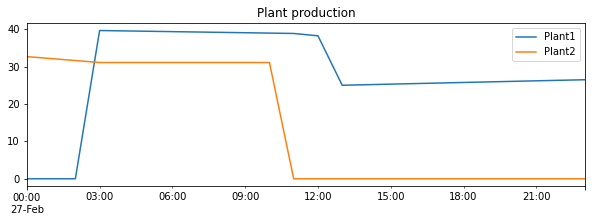

In [12]:
for plantname in s.model.plant:
    s.model.plant[plantname].production.plot(figsize=(10, 3), title='Plant production', legend=True, label=plantname)

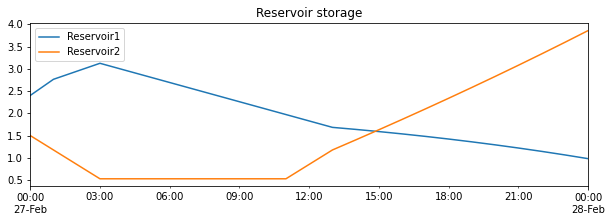

In [13]:
for reservoirname in s.model.reservoir:
    s.model.reservoir[reservoirname].storage.plot(figsize=(10, 3), title='Reservoir storage', legend=True, label=reservoirname)

In [14]:
# Print the non-zero objective results
obj = pd.Series(s.model.objective.average_objective.to_dict())
obj[obj != 0]

solver_status             Optimal solution is available
grand_total                                    -64068.9
total                                          -64068.9
rsv_end_value                                  -23338.8
rsv_end_value_relative                          2877.99
market_sale_buy                                -40730.1
dtype: object

#### Export data

In [15]:
print(s.to_json()[:1000])

{
    "model": {
        "scenario": {
            "S1": {
                "scenario_id": 0
            }
        },
        "objective": {
            "average_objective": {
                "solver_status": "Optimal solution is available",
                "grand_total": -64068.88142233768,
                "sim_grand_total": 0.0,
                "total": -64068.88142233768,
                "rsv_end_value": -23338.772820533806,
                "sim_rsv_end_value": 0.0,
                "rsv_end_value_relative": 2877.9913844346247,
                "market_sale_buy": -40730.10860180388,
                "sim_market_sale_buy": 0.0,
                "load_value": 0.0,
                "reserve_sale_buy": 0.0,
                "reserve_oblig_value": 0.0,
                "contract_value": 0.0,
                "startup_costs": 0.0,
                "sim_startup_costs": 0.0,
                "sum_penalties": 0.0,
                "minor_penalties": 0.0,
                "major_penalties": 0.0,
         

In [16]:
ShopCaseBaseClass(s.to_json())  # Recreate a SHOP case from JSON data

2021-03-02 09:15:10,673 | INFO | shopcasebaseclass.__init__ | Init ShopCase : source_type=<class 'str'>


In [17]:
filename = s.to_file('basic.shop.zip')  # Creates a zip file with yaml files inside
filename

WindowsPath('C:/Users/a165963/repositories/github_shopcase/shopcase/doc/basic.shop.zip')

## Loading YAML data

In [18]:
s2 = ShopCaseBaseClass(filename)

2021-03-02 09:15:11,463 | INFO | shopcasebaseclass.__init__ | Init ShopCase : source_type=<class 'pathlib.WindowsPath'>


## Running a YAML case

In [19]:
s2.run()  # Returns the ShopSession instance for convenience

2021-03-02 09:15:12,506 | INFO | shopcasebaseclass.run | Calling command "start sim 1"
2021-03-02 09:15:12,612 | INFO | shopcasebaseclass.run | Calling command "start sim 1"
2021-03-02 09:15:12,666 | INFO | shopcasebaseclass.run | Calling command "start sim 1"
2021-03-02 09:15:12,831 | INFO | shopcasebaseclass.run | Calling command "set code /incremental"
2021-03-02 09:15:12,937 | INFO | shopcasebaseclass.run | Calling command "start sim 1"
2021-03-02 09:15:12,983 | INFO | shopcasebaseclass.run | Calling command "start sim 1"
2021-03-02 09:15:13,019 | INFO | shopcasebaseclass.run | Calling command "start sim 1"


In [20]:
s2.open_shopdir()  # Open a file explorer at the directory where SHOP created files

In [21]:
s2.case.logs['shop'][:5]  # The SHOP logs are part of the data structure

[{'Description': '13.3.1.b Cplex 12.6.3 Gurobi 7.5 OSI/CBC 2.9 2021-01-29\n\n',
  'Percent': 0,
  'Timestamp': 1614672912,
  'Severity': 'OK',
  'Code': 1032},
 {'Description': 'Current time: Tue Mar  2 09:15:12 2021\n\n',
  'Percent': 0,
  'Timestamp': 1614672912,
  'Severity': 'OK',
  'Code': 1047},
 {'Description': 'License file SHOP_license.dat not found. SHOP is run with standard functionalities.\n',
  'Percent': 0,
  'Timestamp': 1614672912,
  'Severity': 'OK',
  'Code': 3053},
 {'Description': 'License 74 invalid for attribute scenario_id on object scenario',
  'Percent': 0,
  'Timestamp': 1614672912,
  'Severity': 'Warning',
  'Code': 0},
 {'Description': 'License 39 invalid for attribute head_opt on object reservoir',
  'Percent': 0,
  'Timestamp': 1614672912,
  'Severity': 'Warning',
  'Code': 0}]

## Changing and comparing cases

In [22]:
s3 = s2.copy()

2021-03-02 09:15:13,957 | INFO | shopcasebaseclass.__init__ | Init ShopCase : source_type=<class 'shopcasebaseclass.shopcasebaseclass.DictImitator'>


In [23]:
# increase inflow by 50 % in the new case
for reservoirname in s3.model.reservoir:
    if 'inflow' in s3.model.reservoir[reservoirname]:
        s3.model.reservoir[reservoirname].inflow *= 1.5

In [24]:
s2.diff(s3)  # List the differences between two SHOP cases

{'metadata': {'id': True},
 'model': {'reservoir': {'Reservoir1': {'inflow': True}}}}

In [25]:
s3.run()

2021-03-02 09:15:15,875 | INFO | shopcasebaseclass.run | Calling command "start sim 1"
2021-03-02 09:15:16,207 | INFO | shopcasebaseclass.run | Calling command "start sim 1"
2021-03-02 09:15:16,471 | INFO | shopcasebaseclass.run | Calling command "start sim 1"
2021-03-02 09:15:16,660 | INFO | shopcasebaseclass.run | Calling command "set code /incremental"
2021-03-02 09:15:16,773 | INFO | shopcasebaseclass.run | Calling command "start sim 1"
2021-03-02 09:15:17,333 | INFO | shopcasebaseclass.run | Calling command "start sim 1"
2021-03-02 09:15:17,611 | INFO | shopcasebaseclass.run | Calling command "start sim 1"


In [26]:
s2.diff(s3)  # The results are different after we run s3

{'metadata': {'id': True},
 'model': {'plant': {'Plant2': {'production': True,
    'prod_unbalance': True,
    'eff_head': True},
   'Plant1': {'discharge': True,
    'production': True,
    'head_loss': True,
    'prod_unbalance': True,
    'eff_head': True}},
  'generator': {'Plant2_G1': {'lp_production': True,
    'production': True,
    'discharge_fee_objective': True,
    'market_income': True},
   'Plant1_G1': {'committed_out': True,
    'discharge': True,
    'lp_production': True,
    'production': True,
    'discharge_fee_objective': True,
    'market_income': True}},
  'reservoir': {'Reservoir1': {'inflow': True,
    'head': True,
    'storage': True,
    'end_value': True,
    'local_incr_cost_nok_mm3': True,
    'change_in_end_value': True,
    'global_incr_cost_nok_mm3': True},
   'Reservoir2': {'head': True,
    'storage': True,
    'end_value': True,
    'local_incr_cost_nok_mm3': True,
    'change_in_end_value': True,
    'global_incr_cost_nok_mm3': True}},
  'objective

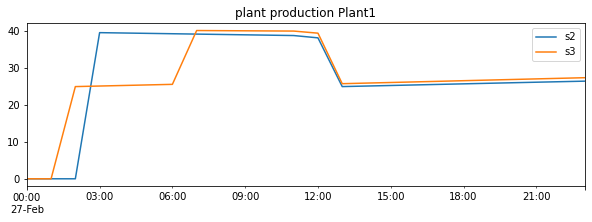

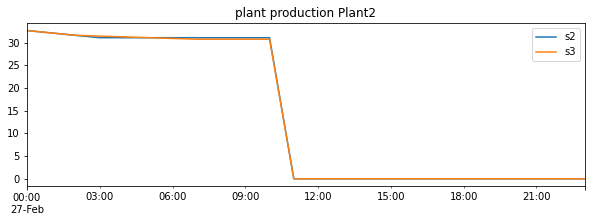

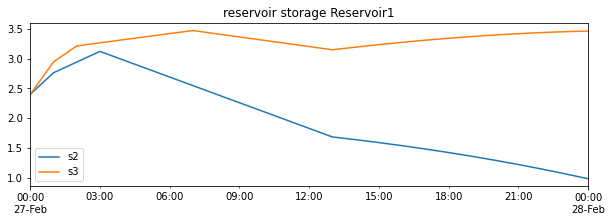

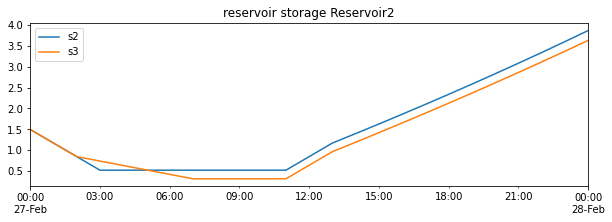

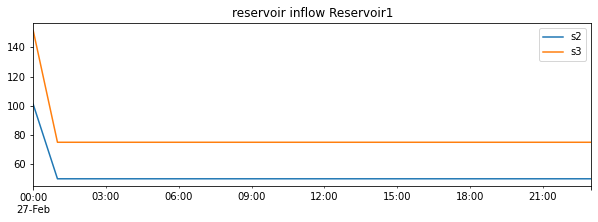

In [27]:
figs = [('plant', 'production'), ('reservoir', 'storage'), ('reservoir', 'inflow')]

for objtype, attr in figs:
    for objname in s.model[objtype]:
        try:
            s2.model[objtype][objname][attr].plot(figsize=(10, 3), title=' '.join([objtype, attr, objname]), legend=True, label='s2')
            s3.model[objtype][objname][attr].plot(legend=True, label='s3')
            plt.show()
        except AttributeError:
            pass
        